# TOI-469: Multiplanet system with LC and RV

We will analyse the photometry and RV data of the 3-planet system, TOI-469 as published in [Damasso et al. 2023](https://ui.adsabs.harvard.edu/abs/2023A&A...679A..33D)

## Download data

In [ ]:
from CONAN.get_files import get_TESS_data

df = get_TESS_data("TOI-469")
df.search() 

SearchResult containing 11 data products.

 #     mission     year       author      exptime target_name distance
                                             s                 arcsec 
--- -------------- ---- ----------------- ------- ----------- --------
  0 TESS Sector 06 2018              SPOC     120    33692729      0.0
  1 TESS Sector 33 2020              SPOC     120    33692729      0.0
  2 TESS Sector 06 2018         TESS-SPOC    1800    33692729      0.0
  3 TESS Sector 33 2020         TESS-SPOC     600    33692729      0.0
  4 TESS Sector 06 2018               QLP    1800    33692729      0.0
  5 TESS Sector 33 2020               QLP     600    33692729      0.0
  6 TESS Sector 06 2018             TASOC     120    33692729      0.0
  7 TESS Sector 06 2018 GSFC-ELEANOR-LITE    1800    33692729      0.0
  8 TESS Sector 06 2018             TASOC    1800    33692729      0.0
  9 TESS Sector 06 2018             TASOC    1800    33692729      0.0
 10 TESS Sector 06 2018           

In [3]:
df.download(sectors=[6,33],author="SPOC", select_flux="pdcsap_flux",
            quality_bitmask='default')

downloaded lightcurve for sector 6
downloaded lightcurve for sector 33


In [ ]:
df.scatter()

In [ ]:
df.lc[6]

In [6]:
df.save_CONAN_lcfile(bjd_ref = 2457000, folder="data")

saved file as: data/TOI-469_S6.dat
saved file as: data/TOI-469_S33.dat


## Data Analysis

In [61]:
import numpy as np
import matplotlib.pyplot as plt

import CONAN
print(f"CONAN version: {CONAN.__version__}")

CONAN version: 3.3.11


   - Transit Photometry: 2 sectors of TESS
   - RV: ESPRESSO

### Setup LC object

In [62]:
path = "data/"
lc_list  = ["TOI-469_S06.dat","TOI-469_S33.dat"]

#### load light curve into CONAN

In [63]:
lc_obj = CONAN.load_lightcurves(file_list      = lc_list, 
                                  data_filepath = path, 
                                  filters       = ["T"], 
                                  lamdas        = [0.8],
                                  nplanet=3)
lc_obj

# ============ Input lightcurves, filters baseline function =======================================================
name            flt 𝜆_𝜇m |Ssmp ClipOutliers scl_col |off col0 col3 col4 col5 col6 col7 col8|sin id GP spline         
TOI-469_S06.dat T   0.8  |None None         None    |  y    0    0    0    0    0    0    0|n    1 n  None           
TOI-469_S33.dat T   0.8  |None None         None    |  y    0    0    0    0    0    0    0|n    2 n  None           


lightcurves from filepath: data/
3 transiting planet(s)
Order of unique filters: ['T']

- The lc_obj object holds information now about the light curves. The light curves can be plotted using the `plot` method of the object.

By default this plots column 0 (time) against column 1 (flux) with column 3(flux err) as uncertainties. 

In [64]:
%matplotlib inline

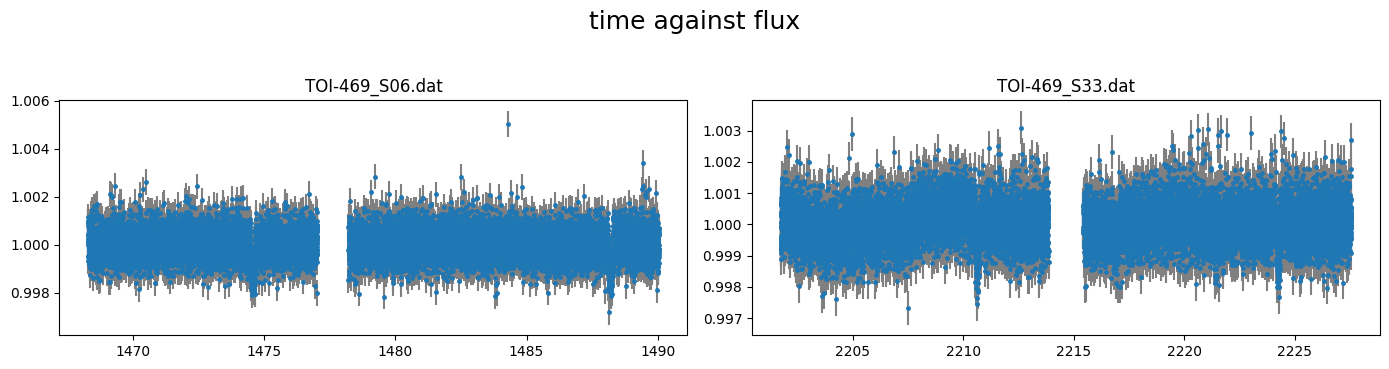

In [65]:
lc_obj.plot()

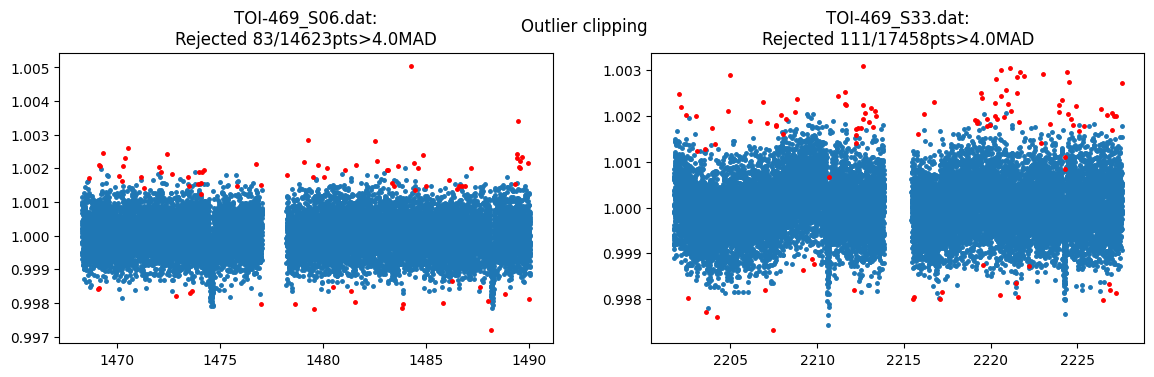

In [66]:
lc_obj.clip_outliers(clip=4, width=15, niter=1, show_plot=True)

#### Planet parameters

In [67]:
traocc_pars =dict( T_0            = [(2210.4,2210.634,2210.8),    #planet 1
                                     (2207.1,2207.252,2207.5),    #planet 2
                                     (2225.1,2225.259,2225.5)],   #planet 3

                    Period        = [(13.6,13.63,13.7),
                                     (3.5,3.5379,3.6), 
                                     (6.4,6.42975,6.5)],

                    Impact_para   = [(0, 0.28, 1), 
                                     (0, 0.617,1), 
                                     (0,0.273,1)],

                    RpRs          = [(0.001,0.0321,0.1), 
                                     (0.001,0.0146,0.1), 
                                     (0.001,0.0127,0.1)],

                    rho_star      = (1.42,0.1),     #same for all planets
                    
                    K             = (0,2,10)        #m/s - unit of rv data
                  )


In [68]:
lc_obj.planet_parameters(**traocc_pars)

# ============ Planet parameters (Transit and RV) setup ========================================================== 
name                       fit 	prior                              	note
[rho_star]/Duration        y   	N(1.42,0.1)                        	#choice in []|unit(gcm^-3/days)
--------repeat this line & params below for multisystem, adding '_planet_number' to the names e.g RpRs_1 for planet 1, ...
RpRs_1                     y   	U(0.001,0.0321,0.1)                	#range[-0.5,0.5]
Impact_para_1              y   	U(0,0.28,1)                        	#range[0,2]
T_0_1                      y   	U(2210.4,2210.634,2210.8)          	#unit(days)
Period_1                   y   	U(13.6,13.63,13.7)                 	#range[0,inf]days
[Eccentricity_1]/sesinw_1  n   	F(0)                               	#choice in []|range[0,1]/range[-1,1]
[omega_1]/secosw_1         n   	F(90)                              	#choice in []|range[0,360]deg/range[-1,1]
K_1                        y   	U(0,2,10) 

#### limb darkening

In [69]:
q1,q2 = lc_obj.get_LDs(Teff           = (5289,69),
                       logg           = (4.24,0.13),
                       Z              = (0.24,0.05),
                       filter_names   = ["TESS"], 
                       use_result     = True)

# lc_obj.limb_darkening(q1=q1,q2=q2)

TESS      (T): q1=(0.3542, 0.0151), q2=(0.4029, 0.0113)

Setting-up limb-darkening priors from LDTk result
# ============ Limb darkening setup ============================================================================= 
filters	fit	q1               	q2               
T      	y  	N(0.3542,0.0151) 	N(0.4029,0.0113) 


#### add GP

model GP as the only baseline model

get estimate rms of each light curve to use as starting point of gp amplitude

In [70]:
np.array(lc_obj._rms_estimate)*1e6

array([548.33239097, 571.47486101])

In [71]:
lc_obj.add_GP(lc_list     = "all",
              par         = ["col0","col0"],
              kernel      = "mat32",
              amplitude   = (1,100, 700),    #in ppm, uses log-uniform prior    
              lengthscale = (0.1,1, 20),    #in days, also log-uniform prior
              gp_pck      = "ce"
             )

# ============ Input lightcurves, filters baseline function =======================================================
name            flt 𝜆_𝜇m |Ssmp ClipOutliers scl_col |off col0 col3 col4 col5 col6 col7 col8|sin id GP spline         
TOI-469_S06.dat T   0.8  |None c1:W15C4n1   None    |  n    0    0    0    0    0    0    0|n    1 ce None           
TOI-469_S33.dat T   0.8  |None c1:W15C4n1   None    |  n    0    0    0    0    0    0    0|n    2 ce None           
# ============ Photometry GP properties (start newline with name of * or + to Xply or add a 2nd gp to last file) =========
name/filt       kern  par    h1:[Amp_ppm]       h2:[len_scale1]    h3:[Q,η,α,b]       h4:[P]       
all             mat32 col0   LU(1,100,700)      LU(0.1,1,20)       None               None        


### Setup RV

In [72]:
import CONAN
import matplotlib.pyplot as plt
path = "data/"


In [73]:
rv_list = ["TOI469rv1.dat", "TOI469rv2.dat" ]
rv_obj = CONAN.load_rvs(file_list     = rv_list, 
                         data_filepath = path,
                         nplanet       = 3,
                         rv_unit       = "m/s",
                         lc_obj        = lc_obj
                        )
rv_obj

# ============ Input RV curves, baseline function, GP, spline,  gamma ============================================ 
name          RVunit scl_col |col0 col3 col4 col5| sin GP spline_config   | gamma_m/s      
TOI469rv1.dat m/s    None    |   0    0    0    0|   0 n  None            | F(0.0)        
TOI469rv2.dat m/s    None    |   0    0    0    0|   0 n  None            | F(0.0)        


rvs from filepath: data/
3 planet(s)

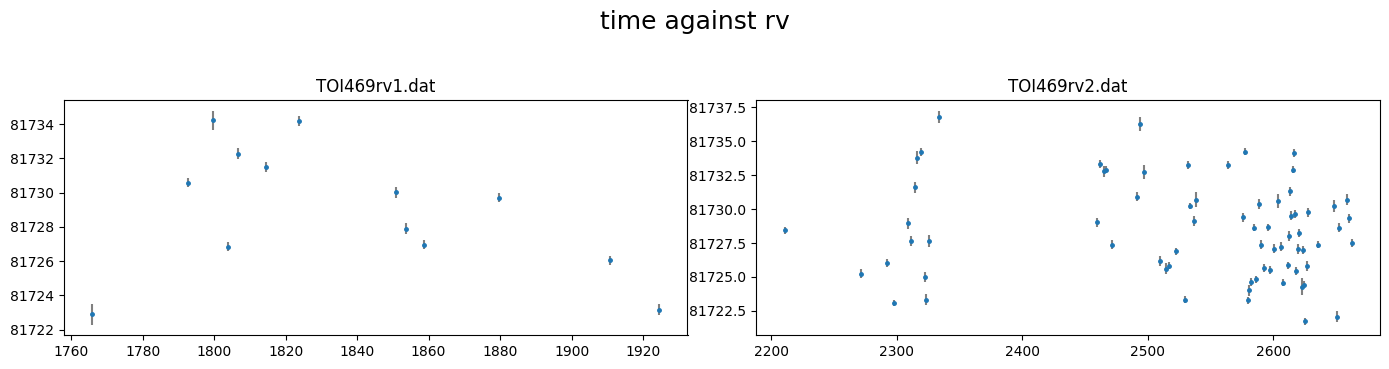

In [74]:
rv_obj.plot()

In [75]:
rv_obj.rv_baseline(gamma = (81728,10))

# ============ Input RV curves, baseline function, GP, spline,  gamma ============================================ 
name          RVunit scl_col |col0 col3 col4 col5| sin GP spline_config   | gamma_m/s      
TOI469rv1.dat m/s    None    |   0    0    0    0|   0 n  None            | N(81728,10)   
TOI469rv2.dat m/s    None    |   0    0    0    0|   0 n  None            | N(81728,10)   


#### add RV GP

Damasso et al. used a quasiperiodic kernel in time to model stellar activity. We will multiply the  exopnential-square (`expsq`)  with a cosine (`cos`) kernel to acheive the quasiperiodic behaviour. 


Note that mutlipling 2 kernels requires the ampltidue of the 2nd kernel to be turned off by setting it to -1

In [76]:
rv_obj.add_rvGP(rv_list   = 'same',
              par         = [("col0",        "col0")],
              kernel      = [("cos",         "expsq")],
              amplitude   = [((0.1, 2, 20),    -1)],    #in same unit as rv, uses log-uniform prior    
              lengthscale = [((0.01,1, 100), (0.01,1, 60))],    #in days, also log-uniform prior
              operation   = ["*"],
              gp_pck      = "ge"    
             )

# ============ Input RV curves, baseline function, GP, spline,  gamma ============================================ 
name          RVunit scl_col |col0 col3 col4 col5| sin GP spline_config   | gamma_m/s      
TOI469rv1.dat m/s    None    |   0    0    0    0|   0 ge None            | N(81728,10)   
TOI469rv2.dat m/s    None    |   0    0    0    0|   0 ge None            | N(81728,10)   
# ============ RV GP properties (start newline with name of * or + to Xply or add a 2nd gp to last file) =======
name          kern  par    h1:[Amp_ppm]       h2:[len_scale]     h3:[Q,η,C,α,b]     h4:[P]      
same          cos   col0   LU(0.1,2,20)       LU(0.01,1,100)     None               None        
          |*| expsq col0   F(-1)              LU(0.01,1,60)      None               None        


### Setup Sampling

In [77]:
fit_obj = CONAN.fit_setup( R_st = (0.993,0.034),
                            M_st = (0.88,0.035))

fit_obj.sampling(n_cpus=10,n_live=1000)

# ============ Stellar input properties ======================================================================
# parameter     value 
Radius_[Rsun]  N(0.993,0.034)
Mass_[Msun]    N(0.88,0.035)
Input_method:[R+rho(Rrho), M+rho(Mrho)]: Rrho
# ============ FIT setup =====================================================================================
Number_steps                              2000 
Number_chains                             64 
Number_of_processes                       10 
Burnin_length                             500 
n_live                                    1000 
force_nlive                               False 
d_logz                                    0.1 
Sampler(emcee/dynesty)                    dynesty 
emcee_move(stretch/demc/snooker)          stretch 
nested_sampling(static/dynamic[pfrac])    static 
leastsq_for_basepar(y/n)                  n 
apply_LCjitter(y/n,list)                  y 
apply_RVjitter(y/n,list)                  y 
LCjitter_loglims(auto/[lo,hi])  

### Export configuration

In [ ]:
CONAN.create_configfile(lc_obj, rv_obj, fit_obj,
                         filename='TOI469_lc_rvconfig.dat')

configuration file saved as TOI469_lc_rvconfig_2.dat


The config file can be reloaded to create all required objects to perform the fit

In [ ]:
# import CONAN
# lc_obj, rv_obj, fit_obj = CONAN.load_configfile('TOI469_lc_rvconfig.dat')

### Perform the fit

finally perform the fitting which is saved to a `results` object that holds the chains of the mcmc and allows subsequent plotting

In [29]:
lc_obj._fit_offset = ["y"]*lc_obj._nphot

In [ ]:
result = CONAN.run_fit(lc_obj,rv_obj, fit_obj, 
                        out_folder="result_TOI469_multi", 
                        rerun_result=True);

## Load result

In [1]:
import CONAN
from CONAN.utils import bin_data, phase_fold
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [97]:
result = CONAN.load_result("result_TOI469_multi")

['lc'] Output files, ['TOI-469_S06_lcout.dat', 'TOI-469_S33_lcout.dat'], loaded into result object
['rv'] Output files, ['TOI469rv1_rvout.dat', 'TOI469rv2_rvout.dat'], loaded into result object


### LC

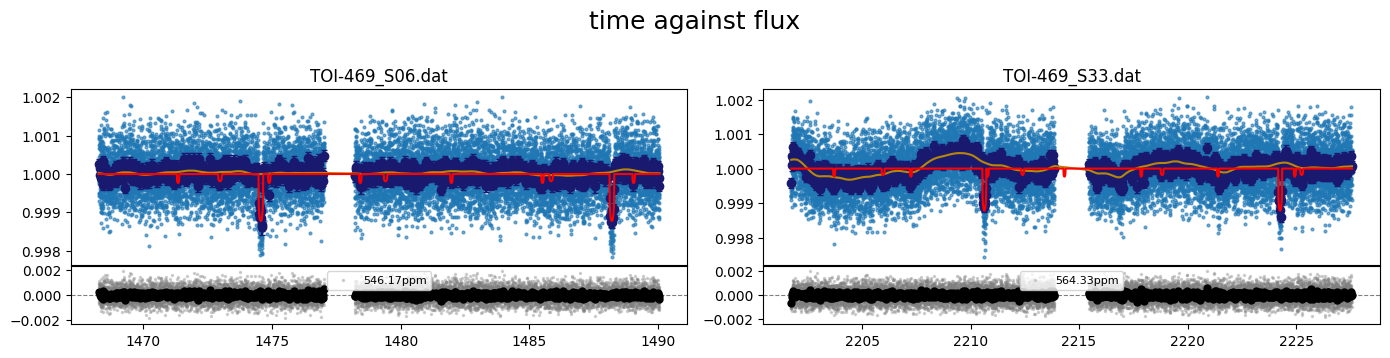

In [98]:
fig = result.lc.plot_bestfit(binsize=0.5/24)

In [99]:
result.lc.names

['TOI-469_S06.dat', 'TOI-469_S33.dat']

In [100]:
#load output data files for the lc fits
lc1data = result.lc.outdata['TOI-469_S06.dat']
lc2data = result.lc.outdata['TOI-469_S33.dat']

lc1data.head()

,time,flux,error,full_mod,base_para,base_sine,base_spl,base_gp,base_total,transit,det_flux,residual,phase_1,phase_2,phase_3
0,1468.276516,1.000369,0.000546,1.000022,1.000028,0.0,1.0,-0.000007,1.000022,1.0,1.000347,0.000347,-0.461651,0.129707,0.268246
1,1468.277905,1.001143,0.000546,1.000021,1.000028,0.0,1.0,-0.000007,1.000021,1.0,1.001122,0.001122,-0.461549,0.130099,0.268462
2,1468.279293,1.000149,0.000546,1.000021,1.000028,0.0,1.0,-0.000007,1.000021,1.0,1.000128,0.000128,-0.461447,0.130492,0.268678
3,1468.280682,0.999294,0.000545,1.000021,1.000028,0.0,1.0,-0.000007,1.000021,1.0,0.999273,-0.000727,-0.461345,0.130885,0.268894
4,1468.282071,0.999478,0.000546,1.000021,1.000028,0.0,1.0,-0.000007,1.000021,1.0,0.999457,-0.000543,-0.461243,0.131277,0.269110


In [101]:
# join two outputs in a single dataframe (so we can plot the model across the times)
lcdata = pd.concat([lc1data,lc2data])
lcdata.head()

,time,flux,error,full_mod,base_para,base_sine,base_spl,base_gp,base_total,transit,det_flux,residual,phase_1,phase_2,phase_3
0,1468.276516,1.000369,0.000546,1.000022,1.000028,0.0,1.0,-0.000007,1.000022,1.0,1.000347,0.000347,-0.461651,0.129707,0.268246
1,1468.277905,1.001143,0.000546,1.000021,1.000028,0.0,1.0,-0.000007,1.000021,1.0,1.001122,0.001122,-0.461549,0.130099,0.268462
2,1468.279293,1.000149,0.000546,1.000021,1.000028,0.0,1.0,-0.000007,1.000021,1.0,1.000128,0.000128,-0.461447,0.130492,0.268678
3,1468.280682,0.999294,0.000545,1.000021,1.000028,0.0,1.0,-0.000007,1.000021,1.0,0.999273,-0.000727,-0.461345,0.130885,0.268894
4,1468.282071,0.999478,0.000546,1.000021,1.000028,0.0,1.0,-0.000007,1.000021,1.0,0.999457,-0.000543,-0.461243,0.131277,0.269110


In [102]:
# evaluate the transit model across both datasets and get individual planet's transit model
lcmod = result.lc.evaluate(time =np.array(lcdata["time"]), return_std=True,nsamp=500)
print(vars(lcmod).keys())

dict_keys(['time', 'planet_model', 'components', 'sigma_low', 'sigma_high'])


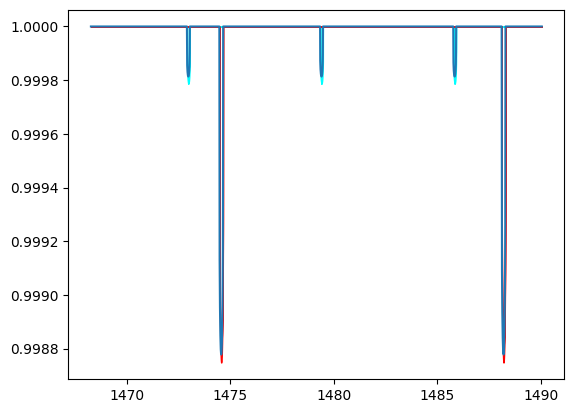

In [ ]:
mod1 = lcmod.components["pl_1"] - 1
mod2 = lcmod.components["pl_2"] - 1
mod3 = lcmod.components["pl_3"] - 1

lo1, hi1 = np.where(mod1==0, 1, lcmod.sigma_low), np.where(mod1==0, 1, lcmod.sigma_high)
lo2, hi2 = np.where(mod2==0, 1, lcmod.sigma_low), np.where(mod2==0, 1, lcmod.sigma_high)
lo3, hi3 = np.where(mod3==0, 1, lcmod.sigma_low), np.where(mod3==0, 1, lcmod.sigma_high)

plt.plot(lcmod.time, lcmod.planet_model - mod2)
plt.fill_between(   lcmod.time,
                    lo3 , 
                    hi3, 
                    color="cyan"
                )

plt.fill_between(   lcmod.time,
                    lo1 , 
                    hi1, 
                    color="r"
                )
# plt.xlim([1470, 1474])

#### Individual planet components

In [103]:
lc_comp = lcmod.components
lc_comp.keys()

dict_keys(['pl_1', 'pl_2', 'pl_3'])

In [104]:
mod1 = lc_comp["pl_1"] - 1
mod2 = lc_comp["pl_2"] - 1
mod3 = lc_comp["pl_3"] - 1

#sigma of each planet's transit model. set sigma outside that planet transit to 1
lo1, hi1 = np.where(mod1==0, 1, lcmod.sigma_low), np.where(mod1==0, 1, lcmod.sigma_high)
lo2, hi2 = np.where(mod2==0, 1, lcmod.sigma_low), np.where(mod2==0, 1, lcmod.sigma_high)
lo3, hi3 = np.where(mod3==0, 1, lcmod.sigma_low), np.where(mod3==0, 1, lcmod.sigma_high)

##### planet 1

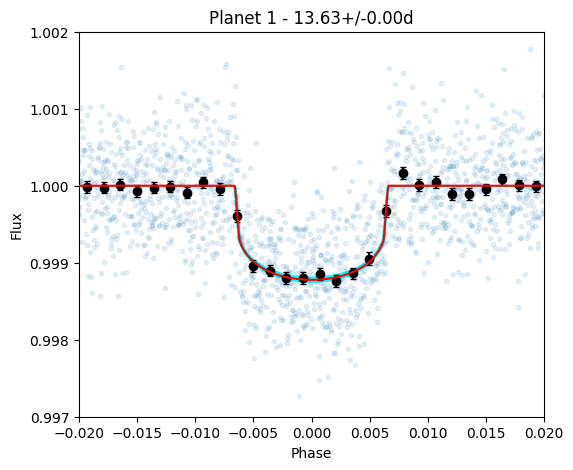

In [105]:
srt = np.argsort(lcdata["phase_1"])
lc_pl1  = lcdata["det_flux"] - mod2 - mod3

plt.figure(figsize=(6,5))
plt.title(f"Planet 1 - {result.params_dict['Period_1']:.2f}d")

plt.plot(lcdata["phase_1"], lc_pl1,".",alpha=0.1)

ph_bin, f_bin, e_bin = bin_data(t   = np.array(lcdata["phase_1"])[srt], 
                                f   = np.array(lc_pl1)[srt], 
                                err = np.array(lcdata["error"])[srt],
                                bins = 700)
plt.errorbar(ph_bin, f_bin, e_bin, fmt="ko",capsize=2)

plt.plot(np.array(lcdata["phase_1"])[srt], 1 + mod1[srt],"r",zorder=3)

plt.fill_between(   np.array(lcdata["phase_1"])[srt],
                    lo1[srt], 
                    hi1[srt], 
                    color="cyan"
                )


plt.ylim([0.997,1.002])
plt.xlim([-0.02,0.02])
plt.ylabel("Flux")
plt.xlabel("Phase");


##### planet 2

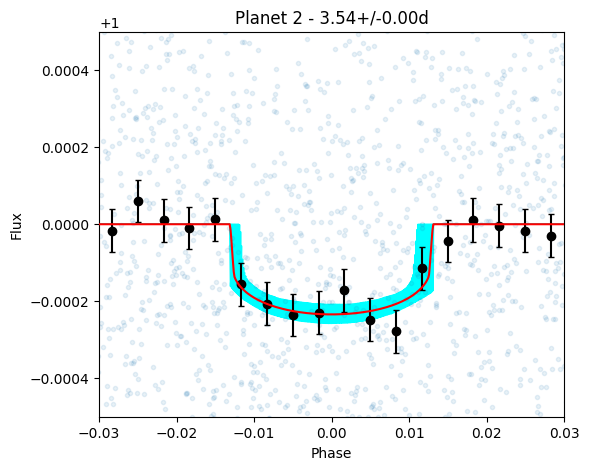

In [108]:
srt = np.argsort(lcdata["phase_2"])
lc_pl2  = lcdata["det_flux"] - mod1 - mod3

plt.figure(figsize=(6,5))
plt.title(f"Planet 2 - {result.params_dict['Period_2']:.2f}d")

plt.plot(lcdata["phase_2"], lc_pl2,".",alpha=0.1)

ph_bin, f_bin, e_bin = bin_data(t   = np.array(lcdata["phase_2"])[srt], 
                                f   = np.array(lc_pl2)[srt], 
                                err = np.array(lcdata["error"])[srt],
                                bins = 300)
plt.errorbar(ph_bin, f_bin, e_bin, fmt="ko",capsize=2)

plt.plot(np.array(lcdata["phase_2"])[srt], 1 + mod2[srt],"r",zorder=3)

plt.fill_between(   np.array(lcdata["phase_2"])[srt],
                    lo2[srt], 
                    hi2[srt], 
                    color="cyan"
                )



plt.ylim([0.9995,1.0005])
plt.xlim([-0.03,0.03])
plt.ylabel("Flux")
plt.xlabel("Phase");


##### planet 3

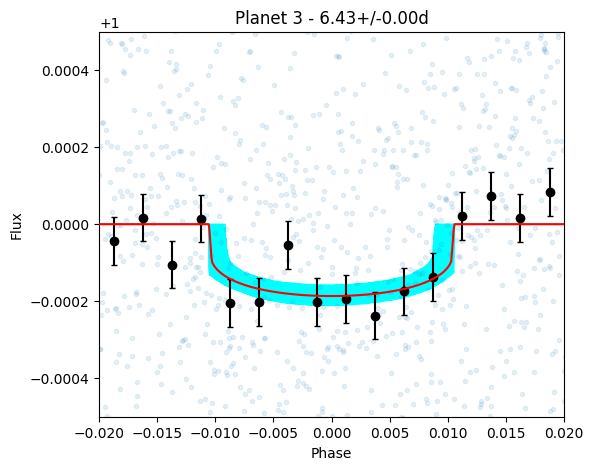

In [109]:
srt = np.argsort(lcdata["phase_3"])
lc_pl3  = lcdata["det_flux"] - mod1 - mod2

plt.figure(figsize=(6,5))
plt.title(f"Planet 3 - {result.params_dict['Period_3']:.2f}d")

plt.plot(lcdata["phase_3"], lc_pl3,".",alpha=0.1)

ph_bin, f_bin, e_bin = bin_data(t   = np.array(lcdata["phase_3"])[srt], 
                                f   = np.array(lc_pl3)[srt], 
                                err = np.array(lcdata["error"])[srt],
                                bins = 400)
plt.errorbar(ph_bin, f_bin, e_bin, fmt="ko",capsize=2)

plt.plot(np.array(lcdata["phase_3"])[srt], 1 + mod3[srt],"r",zorder=3)

plt.fill_between(   np.array(lcdata["phase_3"])[srt],
                    lo3[srt], 
                    hi3[srt], 
                    color="cyan"
                )

plt.ylim([0.99950,1.0005])
plt.xlim([-0.02,0.02])
plt.xlabel("Phase")
plt.ylabel("Flux");


### RVS

In [15]:
result.rv.names

['TOI469rv1.dat', 'TOI469rv2.dat']

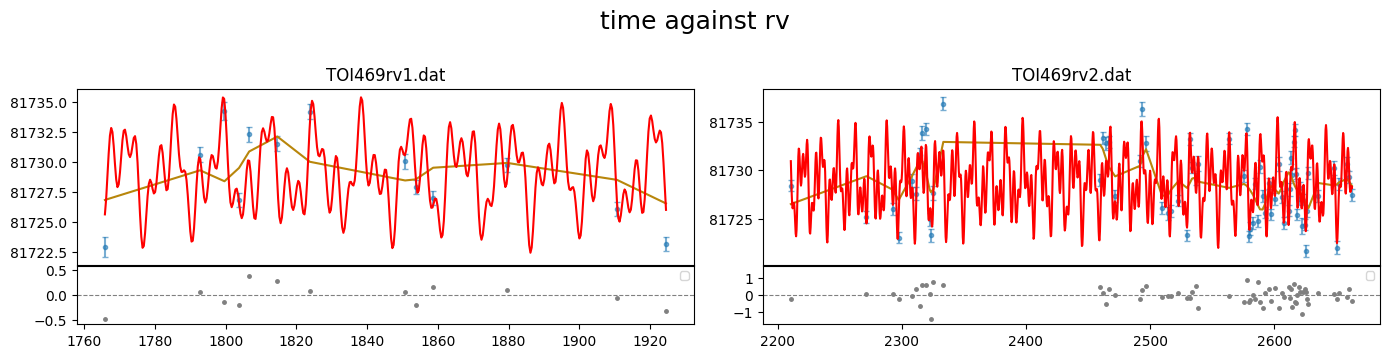

In [16]:
fig = result.rv.plot_bestfit()

In [110]:
#load output data files for the rv fits
rv1data = result.rv.outdata['TOI469rv1.dat']
rv2data = result.rv.outdata['TOI469rv2.dat']

In [111]:
#join two outputs in a single dataframe
rvdata = pd.concat([rv1data,rv2data])
rvdata.head()

,time,RV,error,full_mod,base_para,base_spl,base_gp,base_total,Rvmodel,det_RV,gamma,residual,phase_1,phase_2,phase_3
0,1765.880033,81722.91,0.807069,81723.394084,0.0,0.0,-2.225679,81726.819770,-3.425686,-3.909770,81729.045449,-0.484084,0.371466,0.246949,-0.446126
1,1792.789313,81730.59,0.593431,81730.522613,0.0,0.0,0.239247,81729.284697,1.237916,1.305303,81729.045449,0.067387,0.345614,-0.147178,-0.260984
2,1799.679952,81734.23,0.755553,81734.363394,0.0,0.0,-0.670740,81728.374709,5.988685,5.855291,81729.045449,-0.133394,-0.148867,-0.199548,-0.189298
3,1803.799572,81726.85,0.588948,81727.041896,0.0,0.0,0.436107,81729.481556,-2.439660,-2.631556,81729.045449,-0.191896,0.153361,-0.035143,0.451418
4,1806.664396,81732.28,0.628379,81731.903761,0.0,0.0,1.802835,81730.848284,1.055478,1.431716,81729.045449,0.376239,0.363533,-0.225404,-0.103023


In [112]:
# evaluate the RV model across both datasets
rvmod = result.rv.evaluate(time=np.array(rvdata["time"]), return_std=True, nsamp=500)

since the RVs are sparsely sampled, we can evaluate the RV model on a smoother time array across both datasets

In [113]:
t_sm     = np.linspace(rvdata["time"].min(), rvdata["time"].max(), 2000)
rvmod_sm = result.rv.evaluate(file='TOI469rv1.dat',time=t_sm, return_std=True,nsamp=500)

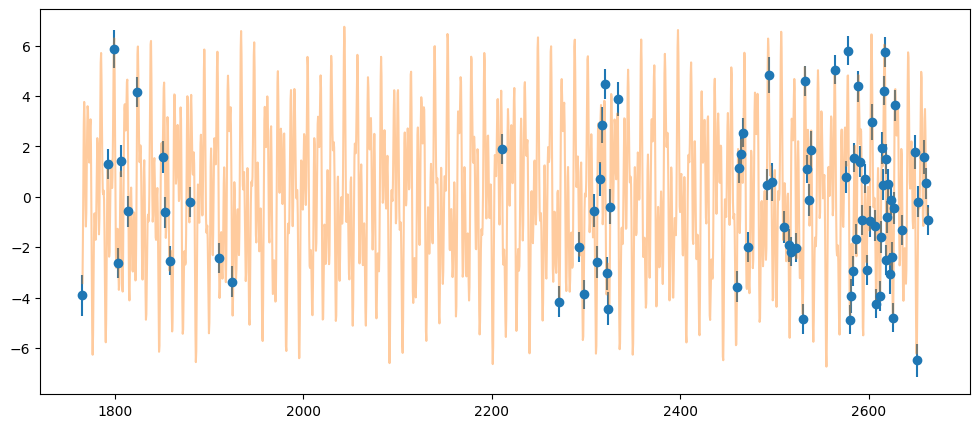

In [114]:
plt.figure(figsize=(12,5))
plt.errorbar(rvdata["time"],rvdata["det_RV"], rvdata["error"],fmt="o")
plt.plot(t_sm, rvmod_sm.planet_model, alpha=0.4)

#### Individual components

In [115]:
rv_comp    = rvmod.components
rv_comp_sm = rvmod_sm.components

In [116]:
rv_comp_sm.keys()

dict_keys(['pl_1', 'pl_2', 'pl_3'])

##### planet 1

Text(0, 0.5, 'RV [m/s]')

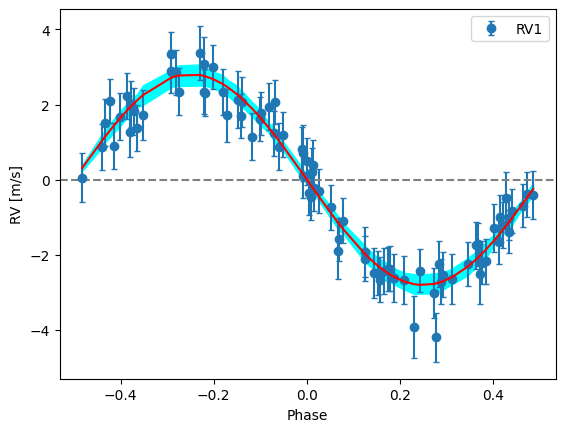

In [117]:
srt = np.argsort(rvdata["phase_1"])
subtract_signal = rv_comp["pl_2"]+rv_comp["pl_3"]

plt.errorbar(   rvdata["phase_1"],
                (rvdata["det_RV"]-subtract_signal), 
                rvdata["error"], 
                fmt="o",capsize=2,
                label="RV1")

plt.plot(np.array(rvdata["phase_1"])[srt], rv_comp["pl_1"][srt],"r",zorder=4)

plt.fill_between(   np.array(rvdata["phase_1"])[srt],
                    (rvmod.sigma_low - subtract_signal)[srt], 
                    (rvmod.sigma_high-subtract_signal)[srt], 
                    color="cyan"
                )

plt.legend()
plt.axhline(0,ls="--",c="gray")
plt.xlabel("Phase")
plt.ylabel("RV [m/s]")

##### planet 2

Text(0, 0.5, 'RV [m/s]')

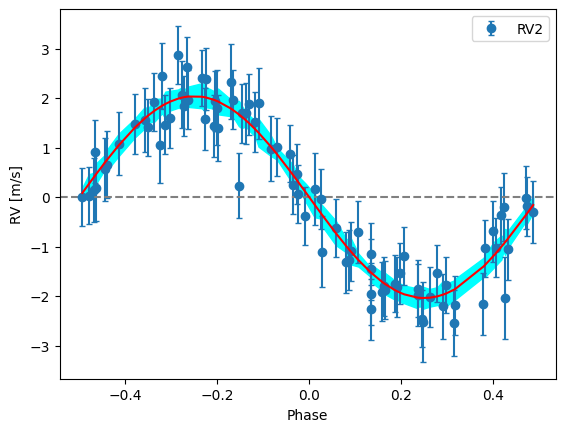

In [118]:
srt = np.argsort(rvdata["phase_2"])
subtract_signal = rv_comp["pl_1"]+rv_comp["pl_3"]

plt.errorbar(   rvdata["phase_2"],
                (rvdata["det_RV"]-subtract_signal),
                rvdata["error"],
                fmt="o",capsize=2,
                label="RV2")

plt.plot(np.array(rvdata["phase_2"])[srt], rv_comp["pl_2"][srt],"r",zorder=4)

plt.fill_between(   np.array(rvdata["phase_2"])[srt],
                    (rvmod.sigma_low - subtract_signal)[srt], 
                    (rvmod.sigma_high-subtract_signal)[srt], 
                    color="cyan"
                )

plt.legend()
plt.axhline(0,ls="--",c="gray")
plt.xlabel("Phase")
plt.ylabel("RV [m/s]")

##### planet 3

Text(0, 0.5, 'RV [m/s]')

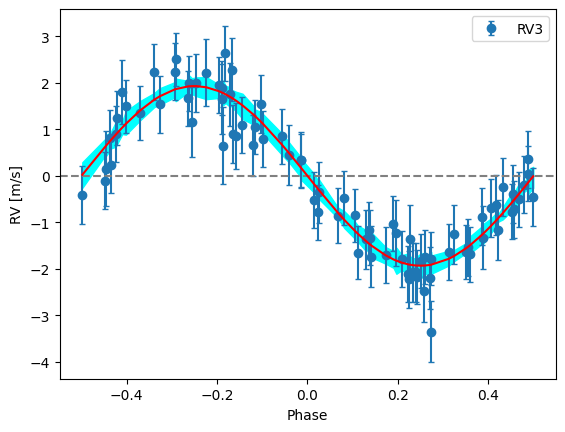

In [119]:
srt = np.argsort(rvdata["phase_3"])
subtract_signal = rv_comp["pl_1"]+rv_comp["pl_2"]

plt.errorbar(   rvdata["phase_3"],
                (rvdata["det_RV"]-subtract_signal),
                rvdata["error"], 
                fmt="o", capsize=2, 
                label="RV3")

plt.plot(np.array(rvdata["phase_3"])[srt], rv_comp["pl_3"][srt],"r", zorder=4)

plt.fill_between(   np.array(rvdata["phase_3"])[srt],
                    (rvmod.sigma_low - subtract_signal)[srt], 
                    (rvmod.sigma_high-subtract_signal)[srt], 
                    color="cyan"
                )

plt.legend()
plt.axhline(0,ls="--",c="gray")
plt.xlabel("Phase")
plt.ylabel("RV [m/s]")